In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
# Load the CSV files
metrics_folder = "~/Documents/digital_twins/metrics/"

df_matlab = pd.read_csv(metrics_folder + "matlab_results.csv")
df_ns3 = pd.read_csv(metrics_folder + "ns3_results_20s.csv")


In [33]:
df_matlab.head()

,Arrival Rate (pps),Simulation Duration (s),Flow Direction,Packets Sent,Packets Received,Average Delay (s),Throughput
0,100,1,AP->STA1,101,100,0.001220,1.2
1,200,1,AP->STA1,201,200,0.001222,2.4
2,300,1,AP->STA1,301,300,0.001223,3.6
3,400,1,AP->STA1,401,400,0.001223,4.8
4,500,1,AP->STA1,501,500,0.001222,6.0


In [34]:
df_ns3.head()

,Arrival Rate (pps),Simulation Duration (s),Flow Direction,Packets Sent,Packets Received,Average Delay (s)
0,1000,20,AP->STA1,20000,19363,0.291591
1,2000,20,AP->STA1,40000,19338,0.489045
2,3000,20,AP->STA1,60001,19338,0.492321
3,4000,20,AP->STA1,80000,19338,0.493528
4,5000,20,AP->STA1,100000,19338,0.494149


In [35]:
# df_ns3 = df_ns3[:30]
# df_matlab = df_matlab[:30]

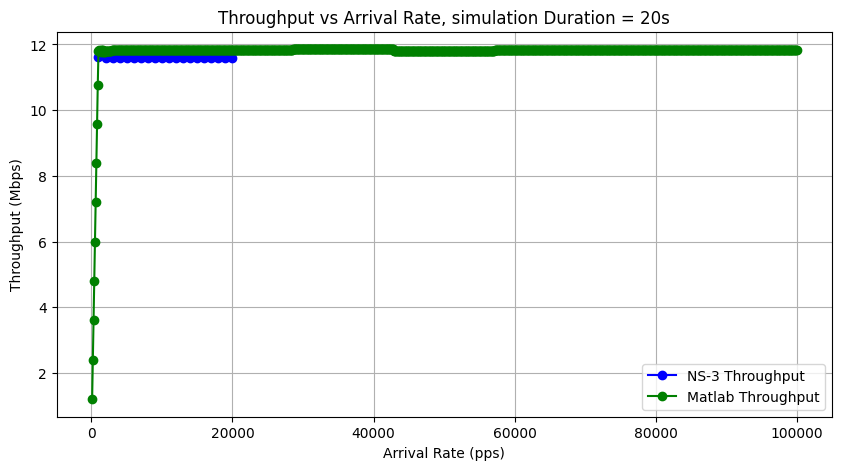

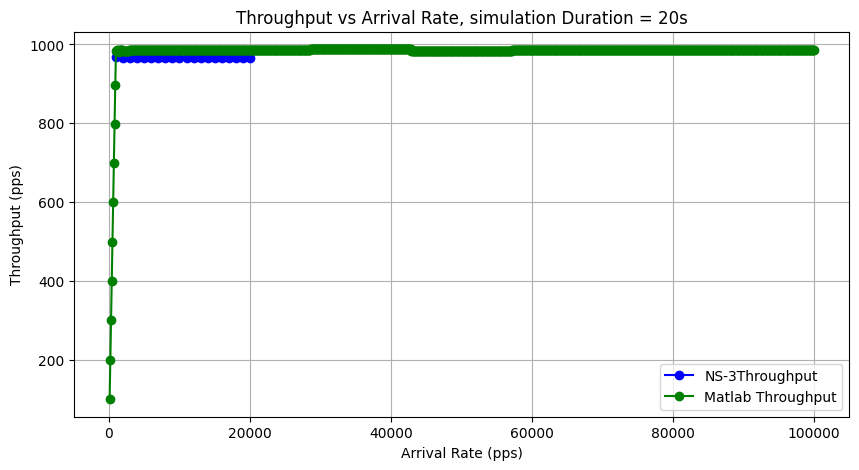

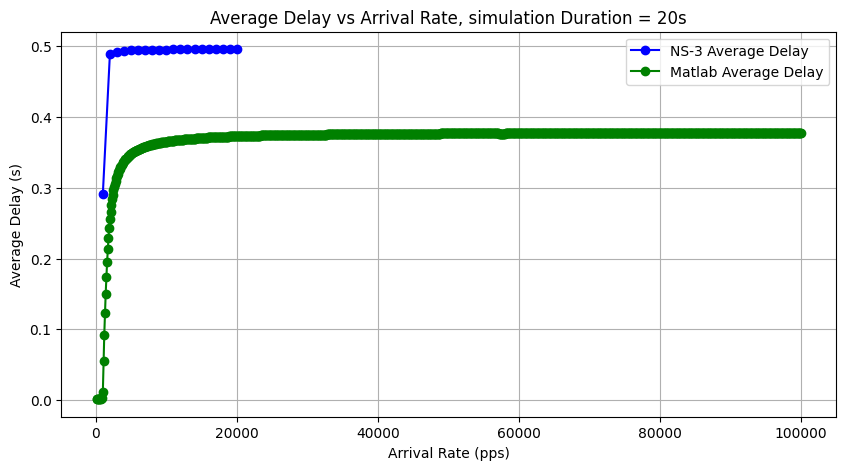

In [36]:
# Tracer l'évolution du débit (throughput) en fonction du taux d'arrivée
# en Mbps
packet_size = 1500 # octets
simulationDuration = df_ns3["Simulation Duration (s)"][0]
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], 
         ((df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"]) * 8 * packet_size) / 1e6, 
         label="NS-3 Throughput", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Throughput"], label="Matlab Throughput", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (Mbps)")
plt.title(f"Throughput vs Arrival Rate, simulation Duration = {simulationDuration}s")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_mbps_ns3_vs_matlab")
plt.show()

# en pps
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"], label="NS-3Throughput", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Packets Received"]/df_matlab["Simulation Duration (s)"], label="Matlab Throughput", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (pps)")
plt.title(f"Throughput vs Arrival Rate, simulation Duration = {simulationDuration}s")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_pps_ns3_vs_matlab")
plt.show()

# Tracer l'évolution du délai moyen en fonction du taux d'arrivée
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Average Delay (s)"], label="NS-3 Average Delay", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Average Delay (s)"], label="Matlab Average Delay", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Average Delay (s)")
plt.title(f"Average Delay vs Arrival Rate, simulation Duration = {simulationDuration}s")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_averageDelay_ns3_vs_matlab")
plt.show()
